CIFAR-10 Dataset link: 
http://www.cs.toronto.edu/~kriz/cifar.html

# PART 1

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import matplotlib.pyplot as plt

C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Initializing parameters

In [2]:
batch_size = 100
num_classes = 10
epochs = 100
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

Loading dataset

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Split datas between train and test sets

In [4]:
print('x_train shape: ', x_train.shape)
print('x_train samples: ', x_train.shape[0])
print('y_train samples: ', y_train.shape)
print('\nnx_test shape: ', x_test.shape)
print('x_test samples: ', x_train.shape[0])
print('y_test samples: ', y_test.shape)

x_train shape:  (50000, 32, 32, 3)
x_train samples:  50000
y_train samples:  (50000, 1)

nx_test shape:  (10000, 32, 32, 3)
x_test samples:  50000
y_test samples:  (10000, 1)


Convert classes vectors to binary class matrices

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('First y_train sample: ', y_train[0])

First y_train sample:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Defining the model 

In [17]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
# model.add(LeakyReLU(alpha=.001))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
# model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
# model.add(LeakyReLU(alpha=.001))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
# model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
# model.add(LeakyReLU(alpha=.001))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Compile model

In [18]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model summary

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
__________

Let's train the model

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.3, batch_size=batch_size, epochs=epochs, shuffle=True)

Plotting loss vs epoch

In [ ]:
# list all data in history
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Evaluate test samples 

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', scores[0])

print('Test accuracy:', scores[1])

Using ReLU activation function, Validation accuracy = 75.67%, Train accuracy = 78.84%, Test accuracy = 75.13%

**Overall, model has high bias and high variance and required more than 3 hrs to train the data.**

Using Leaky ReLU activation function, Validation accuracy = 74.92%, Train accuracy = 79.21%, Test accuracy = 74.98%

**After changing the activation function to Leaky ReLU, model still has high bias and high variance. By inspection, this model required more time than model with ReLU activation to train the data.**

# PART 2

Now, we will check the behaviour of model after feeding scaled training and test samples 

Scaling test and training samples

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Let's train the model

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.3, batch_size=batch_size, epochs=epochs, shuffle=True)

Plotting loss vs epoch

In [ ]:
# list all data in history
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Evaluate test samples 

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', scores[0])

print('Test accuracy:', scores[1])

Validation accuracy = 79.07%, Train accuracy = 84.43%, Test accuracy = 78.3%

**Now, Analyzing this model will show that training error is around 15% whereas validation error is 21%. If we compare with model without scaling the dataset, then test accuracy has increased by 3%. Bias has been decreased but variance is high. Next step will be to reduce high variance.**

**To reduce the high variance problem, we can add more data by data augmentation.**

# PART 3

Now, we will check the behaviour of model after feeding scaled training and test samples 

In [10]:
print('Using real-time data augmentation.')

# This will do preprocessing and realtime data augmentation
datagen = ImageDataGenerator(
    # set input mean to 0 over the dataset
    featurewise_center=False, 
    # set each sample mean to 0
    samplewise_center=False,  
    # divide inputs by std of the dataset
    featurewise_std_normalization=False, 
    # divide each input by its std
    samplewise_std_normalization=False,
    # apply ZCA whitening
    zca_whitening=False,  
    # epsilon for ZCA whitening
    zca_epsilon=1e-06,  
    # randomly rotate images in the range (degrees, 0 to 180)
    rotation_range=0,  
    # randomly shift images horizontally (fraction of total width)    
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    # set range for random shear
    shear_range=0., 
    # set range for random zoom
    zoom_range=0.,  
    # set range for random channel shifts
    channel_shift_range=0.,  
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    # value used for fill_mode = "constant"
    cval=0.,  
    # randomly flip images
    horizontal_flip=True,  
    # randomly flip images
    vertical_flip=False,  
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

Using real-time data augmentation.


In [11]:
# Compute quantities required for feature-wise normalization
datagen.fit(x_train)

Fit the model on the batches generated by datagen.flow()

In [12]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=None, workers=4)

Epoch 1/100
500/500 [==============================] - 302s 604ms/step - loss: 1.9693 - acc: 0.2736
Epoch 2/100
500/500 [==============================] - 291s 583ms/step - loss: 1.7137 - acc: 0.3748
Epoch 3/100
500/500 [==============================] - 284s 568ms/step - loss: 1.6128 - acc: 0.4089
Epoch 4/100
500/500 [==============================] - 277s 555ms/step - loss: 1.5341 - acc: 0.4424
Epoch 5/100
500/500 [==============================] - 267s 534ms/step - loss: 1.4725 - acc: 0.4651
Epoch 6/100
500/500 [==============================] - 269s 538ms/step - loss: 1.4198 - acc: 0.4868
Epoch 7/100
500/500 [==============================] - 267s 533ms/step - loss: 1.3767 - acc: 0.5036
Epoch 8/100
500/500 [==============================] - 265s 529ms/step - loss: 1.3426 - acc: 0.5180
Epoch 9/100
500/500 [==============================] - 264s 529ms/step - loss: 1.3010 - acc: 0.5334
Epoch 10/100
500/500 [==============================] - 265s 529ms/step - loss: 1.2737 - acc: 0.5443

500/500 [==============================] - 267s 535ms/step - loss: 0.7224 - acc: 0.7503
Epoch 83/100
500/500 [==============================] - 267s 534ms/step - loss: 0.7220 - acc: 0.7519
Epoch 84/100
500/500 [==============================] - 271s 541ms/step - loss: 0.7110 - acc: 0.7525
Epoch 85/100
500/500 [==============================] - 266s 531ms/step - loss: 0.7139 - acc: 0.7543
Epoch 86/100
500/500 [==============================] - 262s 525ms/step - loss: 0.7150 - acc: 0.7560
Epoch 87/100
500/500 [==============================] - 263s 526ms/step - loss: 0.7094 - acc: 0.7592
Epoch 88/100
500/500 [==============================] - 264s 528ms/step - loss: 0.7132 - acc: 0.7555
Epoch 89/100
500/500 [==============================] - 263s 526ms/step - loss: 0.7112 - acc: 0.7578
Epoch 90/100
500/500 [==============================] - 262s 524ms/step - loss: 0.7060 - acc: 0.7581
Epoch 91/100
500/500 [==============================] - 262s 524ms/step - loss: 0.7024 - acc: 0.7618
Epo

Plotting loss vs epoch

dict_keys(['loss', 'acc'])


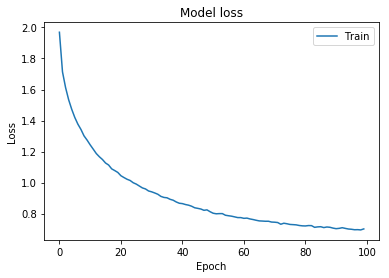

In [16]:
# list all data in history
print(history.history.keys())

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

Evaluate test samples 

In [15]:
scores = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', scores[0])

print('Test accuracy:', scores[1])

10000/10000 [==============================] - 21s 2ms/step
Test loss: 0.6223537016868591
Test accuracy: 0.788


Train accuracy = 75.98%, Test accuracy = 78.8%

**If we compare the train accuracy with model applied after scaled data, then it has decreased by 8% and test accuracy has increased by just 0.5%. We can see that model still has high bias problem and adding the data to train the model has not helped in this case. We can try to add the features or train with different model to check the performance.**